In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('mnist_train.csv')
print(df.shape)

(42000, 785)


In [29]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [30]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [32]:
X = data[:,1:]
Y = data[:,0]

print(X.shape, Y.shape)

(42000, 784) (42000,)


In [35]:
split = int(0.8*X.shape[0])
split

33600

In [39]:
x_train = X[:split, :]
y_train = Y[:split]
x_test = X[split:, :]
y_test = Y[split:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


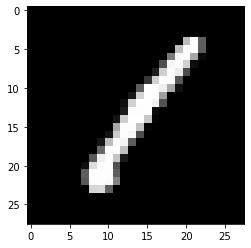

In [45]:
def draw(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
draw(x_train[0])

In [46]:
#KNN
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
                   
def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

Predction

In [47]:
pred = knn(x_train,y_train,x_test[0])
print(int(pred))

0


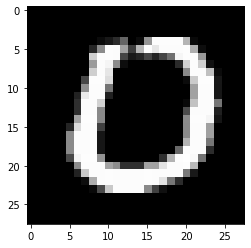

In [49]:
draw(x_test[0])